# Machine Learning Model

In [1]:
import pandas as pd
import numpy as np
import string
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

### Read The unbalanced dataset

In [2]:
unbalanced_data = pd.read_csv("clean_data.csv")[['clean text','dialect']]
unbalanced_data.head()

,clean text,dialect
0,بالنهايه ينتفض يغير,IQ
1,يعني محسوب البشر حيونه ووحشيه وتطلبون الغرب يح...,IQ
2,مبين كلامه خليجي,IQ
3,يسلملي مرورك وروحك الحلوه,IQ
4,وين الغيبه اخ محمد,IQ


### Take a balanced sample

In [34]:
data = unbalanced_data.groupby('dialect')
data = pd.DataFrame(data.apply(lambda x: x.sample(data.size().min()).reset_index(drop=True))).sample(n=20000)

### Removing The nulls and duplicates

In [35]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True) 

In [36]:
data['clean text'].isna().sum()

0

In [37]:
data.info

<bound method DataFrame.info of                                                      clean text dialect
dialect                                                                
TN      660   نموت ليتوال تقول انتي مدام نحب ليتوال لازم نكر...      TN
KW      1825  اعرف تماما ياابو عمر باني شخص لايرضيني الكذب و...      KW
PL      3175                        عام وانت بخير وينك مفتقدينك      PL
MA      4360  اوا صافي حيتاش مكانوش متاكدين راه ولاد اكادير ...      MA
EG      2732  ابويا 75 سنه قاعد يتفرج قناه الجزيره وبيقول ال...      EG
...                                                         ...     ...
AE      303    ٭٭الله يبارك فيك كلك ذوق خلنا نحب ونداري احفادنا      AE
LY      5348                    جنون واذا انصاب بقطع رباطه الحل      LY
JO      1405              يبارك بعمرك رنا عقبال احضر مناقشتك رب      JO
MA      990   نهضه بركان الا بغاو يربحو الماتش جاي خاصهم تدر...      MA
SD      4533                        بالاول حسيت انها ترجمه قوقل      SD

[19999 rows x 2 columns]>

<AxesSubplot:>

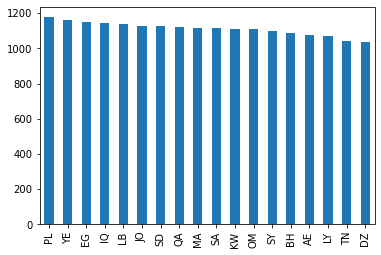

In [38]:
data["dialect"].value_counts().plot.bar()

### Splitting The balanced dataset into train and test sets

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(data['clean text'], data['dialect'], test_size =.2, random_state=100)

In [40]:
pipe = make_pipeline(TfidfVectorizer(),SVC())

In [41]:
pipe.fit(X_train, Y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()), ('svc', SVC())])

In [42]:
prediction = pipe.predict(X_test)

In [43]:
print(f"Accuracy score is {accuracy_score(Y_test, prediction):.2f}")

Accuracy score is 0.33


### Saving The Trained Model

In [44]:
# import joblib
from joblib import dump

# dump the pipeline model
dump(pipe, filename="text_classification.joblib")

['text_classification.joblib']